In [1]:
from matplotlib import pyplot as plt
import matplotlib
from sklearn import preprocessing
import os
import numpy as np
import random as rd
#import sympy 
import csv
import seaborn as sns
import cvxopt;
from cvxpy import Minimize, Problem, Variable,norm1,norm2,installed_solvers,lambda_max;
from cvxpy import norm as cvxpynorm;
import cvxpy;
import tensorflow as tf 
tf.compat.v1.disable_eager_execution()
sess  = tf.compat.v1.InteractiveSession()
from scipy.integrate import odeint
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter

In [2]:
def model(x):
    a11, a12, a21, a22, gamma = np.array([0.9, 0, 0.7, 0.7, 0.4])
    x_f1 = a11*x[0] + a12*x[1]
    x_f2 = a21*x[0] + a22*x[1] + gamma*x[0]**2
    return [x_f1, x_f2]


In [3]:
ICs = []
num_ics = 50
for i in range(0, num_ics):
    r = rd.uniform(30, 40)
    theta = rd.uniform(0, 4*1.57)
    ICs.append([r*np.cos(theta), r*np.sin(theta)])

ic_lower = 10
ic_upper = 20
steps    = 1
angular_steps = 300
states = 2
ICs = np.array([[[r*np.cos(theta), r*np.sin(theta)] for r in np.linspace(ic_lower,ic_upper,steps)] for theta in np.linspace(0, 360, angular_steps)])

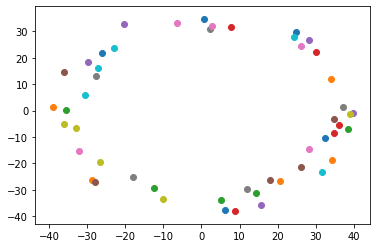

In [4]:
for i in range(0, num_ics):
    plt.scatter(ICs[i][0],ICs[i][1])

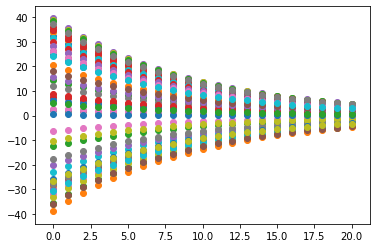

In [5]:
N = 20
Xp_final = []
Xf_final = []
t = np.array([i for i in range(0, N+1)])
x = np.zeros(2)
for ic in ICs:
    x[0] = ic[0]
    x[1] = ic[1]
    X = []
    X_actual = []
    X.append([x[0], x[1]])
    for k in range(0, N):
        y = model(x)
        x = y
        X.append([x[0], x[1]])
    Xp = X[0:-1]
    Xf = X[1:]
    plt.scatter(t, np.array(X).T[0])
    Xp_final.append(Xp)
    Xf_final.append(Xf)



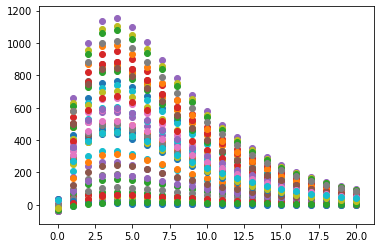

In [6]:
N = 20
Xp_final = []
Xf_final = []
t = np.array([i for i in range(0, N+1)])
x = np.zeros(2)
for ic in ICs:
    x[0] = ic[0]
    x[1] = ic[1]
    X = []
    X_actual = []
    X.append([x[0], x[1]])
    for k in range(0, N):
        y = model(x)
        x = y
        X.append([x[0], x[1]])
    Xp = X[0:-1]
    Xf = X[1:]
    plt.scatter(t, np.array(X).T[1])
    Xp_final.append(Xp)
    Xf_final.append(Xf)



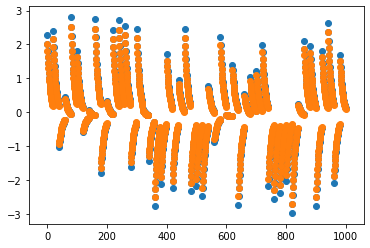

In [7]:
np.array(Xp_final).shape
states = 2

Xp_ref = np.array(Xp_final).reshape(num_ics*(N), states)
Xf_ref = np.array(Xf_final).reshape(num_ics*(N), states)
Up_ref = np.zeros(len(Xp_ref))

scaler = StandardScaler().fit(Xp_ref)
Xp_ref_scaled = scaler.transform(Xp_ref)
Xf_ref_scaled = scaler.transform(Xf_ref)

pickle.dump([Xp_ref_scaled, Xf_ref_scaled, Up_ref], open('koopman_data/CFS_Koopman_correct_ics2.pickle', 'wb'),  protocol = 2)

plt.scatter(np.linspace(0, len(Xp_ref_scaled[:, 0]), len(Xp_ref_scaled[:, 0])), Xp_ref_scaled[:, 0])
plt.scatter(np.linspace(0, len(Xf_ref_scaled[:, 0]), len(Xf_ref_scaled[:, 0])), Xf_ref_scaled[:, 0])


P = np.diag(scaler.scale_)
b = scaler.mean_

scaler_filename = "Checkpoint_files/scaler.save"
joblib.dump(scaler, scaler_filename) 

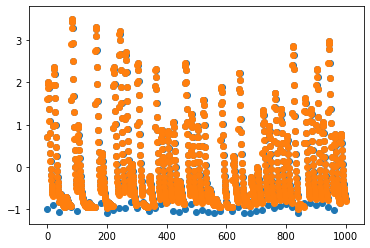

In [8]:
plt.scatter(np.linspace(0, len(Xp_ref_scaled[:, 1]), len(Xp_ref_scaled[:, 1])), Xp_ref_scaled[:, 1])
plt.scatter(np.linspace(0, len(Xf_ref_scaled[:, 1]), len(Xf_ref_scaled[:, 1])), Xf_ref_scaled[:, 1])
